https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb

# **Follow above link for more details**

https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&discretize_hide=true&regularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true

# **Use above link for practice**

In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


In [54]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [56]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X_train[:,0], "X1":X_train[:,1], "Label":y_train})
circles.head()

,X0,X1,Label
0,0.657946,-0.465081,1
1,0.631949,-0.734663,0
2,-1.008616,-0.124031,0
3,-0.966575,-0.225622,0
4,-0.166590,0.799446,1


In [57]:
# Check out the different labels
circles.Label.value_counts(), circles.X0.value_counts()

(1    400
 0    400
 Name: Label, dtype: int64, -0.022425    1
  0.974102    1
 -0.412747    1
 -0.139648    1
 -0.950345    1
             ..
  0.229551    1
  0.440869    1
  0.361552    1
  0.716414    1
  0.953025    1
 Name: X0, Length: 800, dtype: int64)

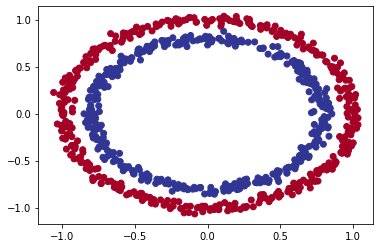

In [58]:
plt.scatter(circles.X0.values,circles.X1.values, c=y_train, cmap=plt.cm.RdYlBu );

In [59]:
 #Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
      tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history = model_1.fit(X_train, y_train, epochs=100, verbose=0)

In [60]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...
doing binary classifcation...


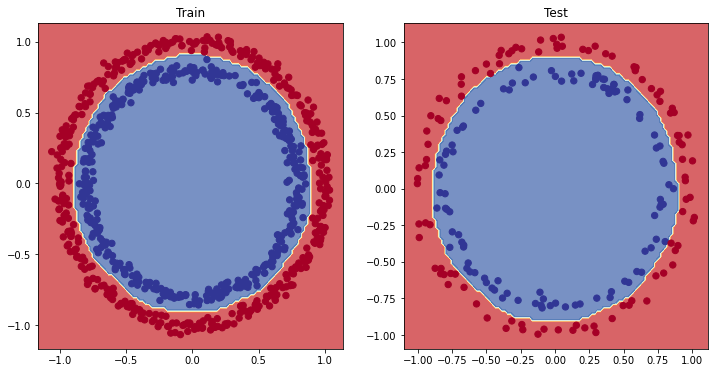

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [62]:
model_1_loss, model_1_accuracy =  model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 6.6691e-04 - accuracy: 1.0000


In [63]:
model_1_loss, model_1_accuracy

(0.0006669121794402599, 1.0)

Text(0.5, 0, 'epochs')

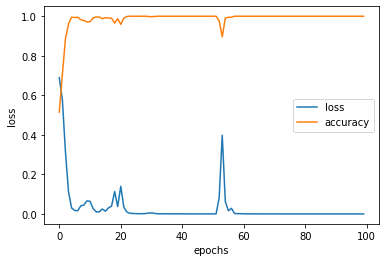

In [64]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [65]:
his = pd.DataFrame(history.history)
his.tail()

,loss,accuracy
95,0.000039,1.0
96,0.000039,1.0
97,0.000037,1.0
98,0.000036,1.0
99,0.000036,1.0


# **Model-2**

In [66]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(50, activation="relu"),         # we can use strings here too
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(50, activation="relu"),
      tf.keras.layers.Dense(1,"sigmoid")
])

# 2. Compile the model
model_2.compile(loss="binary_crossentropy", # we can use strings here too.         Binary since we are working with 2 clases (0 & 1)
                optimizer="Adam",           # same as tf.keras.optimizers.Adam() with default settings
                metrics=['accuracy'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, 
#increasing by 10**(epoch/20) every epoch
# 3. Fit the model
history = model_2.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0)

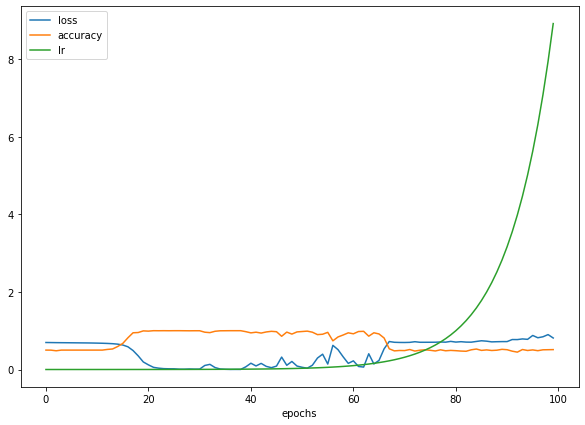

In [67]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

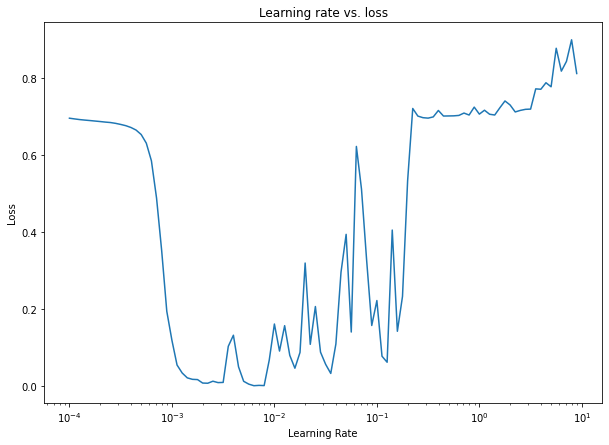

In [68]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between 0.001 ($10^{-3}$) and 0.01.

So let learning rate = 0.005.

# **Model_3**

In [69]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(50, activation="relu"),         # we can use strings here too
      tf.keras.layers.Dense(100,activation="relu"),
      tf.keras.layers.Dense(50, activation="relu"),
      tf.keras.layers.Dense(1,"sigmoid")
])

# 2. Compile the model
model_3.compile(loss="binary_crossentropy", # we can use strings here too.         Binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=['accuracy'])

# 3. Fit the model
history = model_3.fit(X_train, y_train, epochs=100, verbose=0)

doing binary classifcation...
doing binary classifcation...


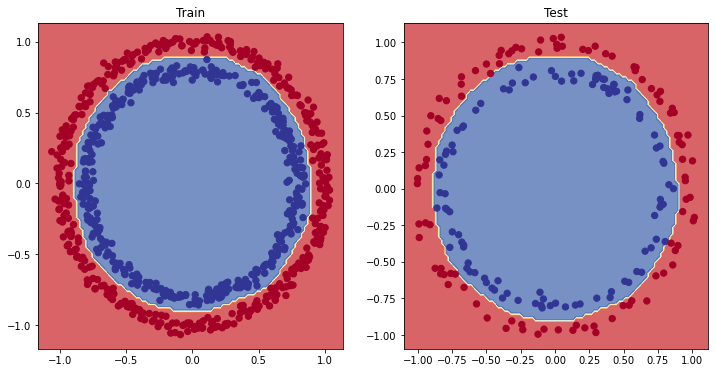

In [70]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [71]:
model_1_loss, model_1_accuracy =  model_1.evaluate(X_test, y_test)
model_1_loss, model_1_accuracy

7/7 [==============================] - 0s 3ms/step - loss: 6.6691e-04 - accuracy: 1.0000


(0.0006669121794402599, 1.0)

In [52]:
model_3_loss, model_3_accuracy =  model_3.evaluate(X_test, y_test)
model_3_loss, model_3_accuracy

7/7 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000


(0.0021978949662297964, 1.0)

As model_1 and model_3 have learning rate between 0.001 and 0.01 (according to callback ftn in model_2),  we gets same accuracy

Text(0.5, 0, 'epochs')

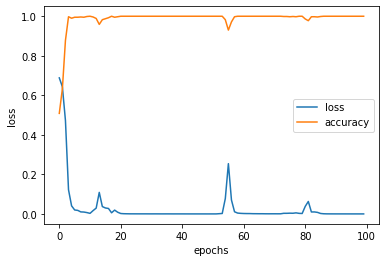

In [72]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# **More evaluation Metrics**

# Confusion_Matrix

In [81]:
y_preds = model_3.predict(X_test)
y_preds.squeeze().shape, y_test.shape

((200,), (200,))

In [84]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_3.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds.squeeze()))

array([[100,   0],
       [  0, 100]])

In [87]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
              size=text_size)

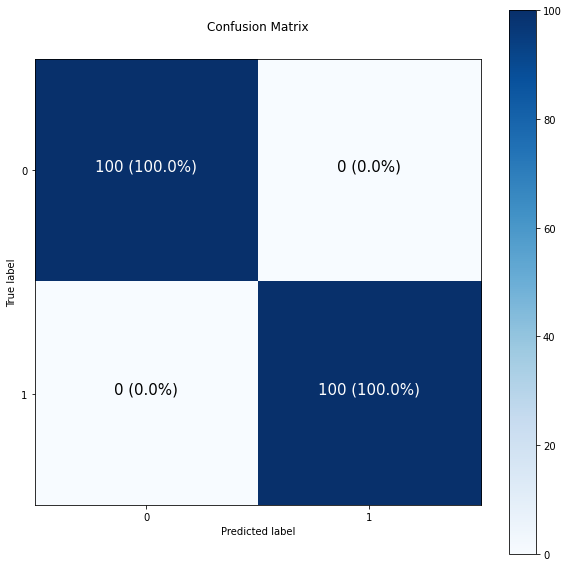

In [88]:
make_confusion_matrix(y_test,tf.round(y_preds.squeeze()) )

# **Model_4- Working with a larger example (multiclass classification)**

In [90]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [91]:
train_data.shape, train_labels.shape, len(train_data), len(test_data)

((60000, 28, 28), (60000,), 60000, 10000)

In [92]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

9 --->


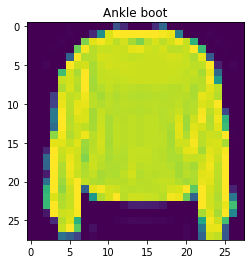

In [110]:
# Plot a single example
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randint(60000)
print(train_labels[x],"--->")
plt.title(class_names[train_labels[x]])
plt.imshow(train_data[7]);

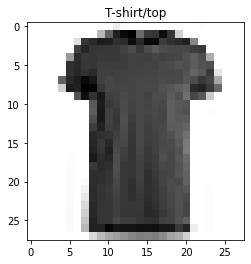

In [111]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

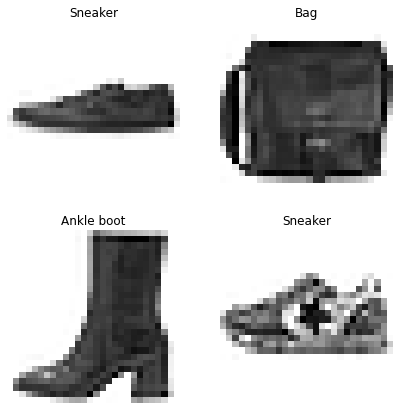

In [112]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [113]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_4.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4995 - accuracy: 0.8234 - val_loss: 0.4157 - val_accuracy: 0.8511
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3681 - accuracy: 0.8665 - val_loss: 0.4468 - val_accuracy: 0.8442
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8759 - val_loss: 0.3898 - val_accuracy: 0.8579
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3117 - accuracy: 0.8855 - val_loss: 0.3912 - val_accuracy: 0.8593
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.8897 - val_loss: 0.3631 - val_accuracy: 0.8683
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2817 - accuracy: 0.8948 - val_loss: 0.3935 - val_accuracy: 0.8533
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.8977 - val_loss: 0.3641 - val_accuracy:

In [114]:
model_4.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_79 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_80 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


# **Model_5-Normalizing_data**

In [115]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [116]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 0.00392156862745098)

In [117]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_4.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9200 - accuracy: 0.6676 - val_loss: 0.6491 - val_accuracy: 0.7598
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5851 - accuracy: 0.7859 - val_loss: 0.5686 - val_accuracy: 0.7951
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5218 - accuracy: 0.8117 - val_loss: 0.5336 - val_accuracy: 0.8060
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4828 - accuracy: 0.8285 - val_loss: 0.4956 - val_accuracy: 0.8224
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4556 - accuracy: 0.8365 - val_loss: 0.4796 - val_accuracy: 0.8272
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4337 - accuracy: 0.8460 - val_loss: 0.4664 - val_accuracy: 0.8312
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4176 - accuracy: 0.8502 - val_loss: 0.4620 - val_accuracy:

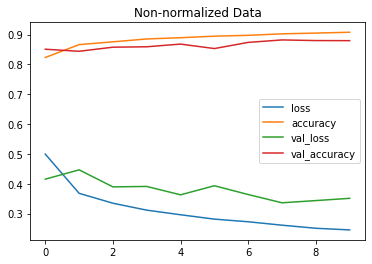

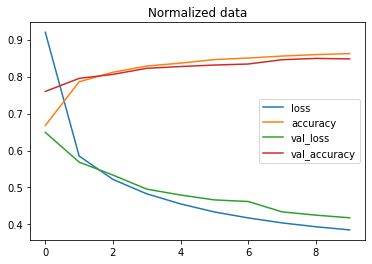

In [118]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

# **Model_5-Using callback**

In [126]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_4.fit(train_data,
                                train_labels,
                                epochs=40,
                                validation_data=(test_data, test_labels),
                                callbacks=[lr_scheduler]) # see how the model performs on the test set during training

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9200 - accuracy: 0.6676 - val_loss: 0.6491 - val_accuracy: 0.7598
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5821 - accuracy: 0.7869 - val_loss: 0.5647 - val_accuracy: 0.7960
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5142 - accuracy: 0.8145 - val_loss: 0.5250 - val_accuracy: 0.8092
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4710 - accuracy: 0.8332 - val_loss: 0.4822 - val_accuracy: 0.8254
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4405 - accuracy: 0.8422 - val_loss: 0.4817 - val_accuracy: 0.8247
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4170 - accuracy: 0.8507 - val_loss: 0.4503 - val_accuracy: 0.8365
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3996 - accuracy: 0.8560 - val_loss: 0.4415 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

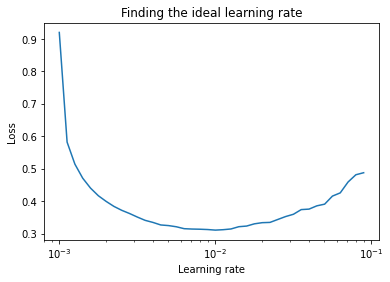

In [127]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.001) is the ideal learning rate.

As in model-3,4

In [130]:
y_prob_fashion = model_4.predict(test_data)

y_prob_fashion[:5]

array([[2.1712994e-22, 9.9025087e-17, 2.5182571e-14, 2.7091053e-14,
        1.3981812e-19, 1.4157575e-01, 1.8484593e-12, 2.4746057e-02,
        3.3173578e-06, 8.3367491e-01],
       [3.1171914e-04, 3.7416947e-05, 9.9165523e-01, 1.8113205e-04,
        5.5693616e-03, 3.2974943e-21, 2.2294810e-03, 2.1396082e-12,
        1.5584916e-05, 0.0000000e+00],
       [1.6225501e-34, 1.0000000e+00, 4.2585463e-32, 6.3384333e-12,
        5.4429406e-25, 6.2671856e-37, 7.1279457e-31, 0.0000000e+00,
        6.1133252e-22, 0.0000000e+00],
       [2.7537918e-35, 1.0000000e+00, 1.6601466e-35, 3.9833284e-12,
        2.2137222e-27, 0.0000000e+00, 1.0863336e-32, 0.0000000e+00,
        1.2529656e-23, 0.0000000e+00],
       [2.0428334e-01, 3.6840471e-03, 2.1452652e-01, 1.3252862e-01,
        1.3429555e-01, 3.1052950e-05, 2.4956888e-01, 4.4312110e-12,
        6.1082035e-02, 2.6325952e-13]], dtype=float32)

In [132]:
y_pred_fashion = y_prob_fashion.argmax(axis = 1)
y_pred_fashion

array([9, 2, 1, ..., 5, 1, 5])

In [138]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_pred_fashion)

array([[865,   5,  13,  28,   3,  22,  44,   0,  20,   0],
       [  4, 969,   0,  15,   3,   4,   2,   0,   3,   0],
       [ 14,   4, 708,  10, 163,   3,  76,   0,  22,   0],
       [ 87,  25,   8, 761,  26,  61,  24,   0,   8,   0],
       [  3,   2,  76,  47, 782,   4,  83,   0,   3,   0],
       [  0,   0,   0,   0,   0, 968,   0,  19,   1,  12],
       [269,   2,  81,  17, 109,  20, 464,   0,  38,   0],
       [  0,   0,   0,   0,   0,  63,   0, 884,   0,  53],
       [  2,   1,   4,   7,   6,  47,   7,   3, 923,   0],
       [  0,   0,   0,   0,   0,  35,   1,  18,   0, 946]])

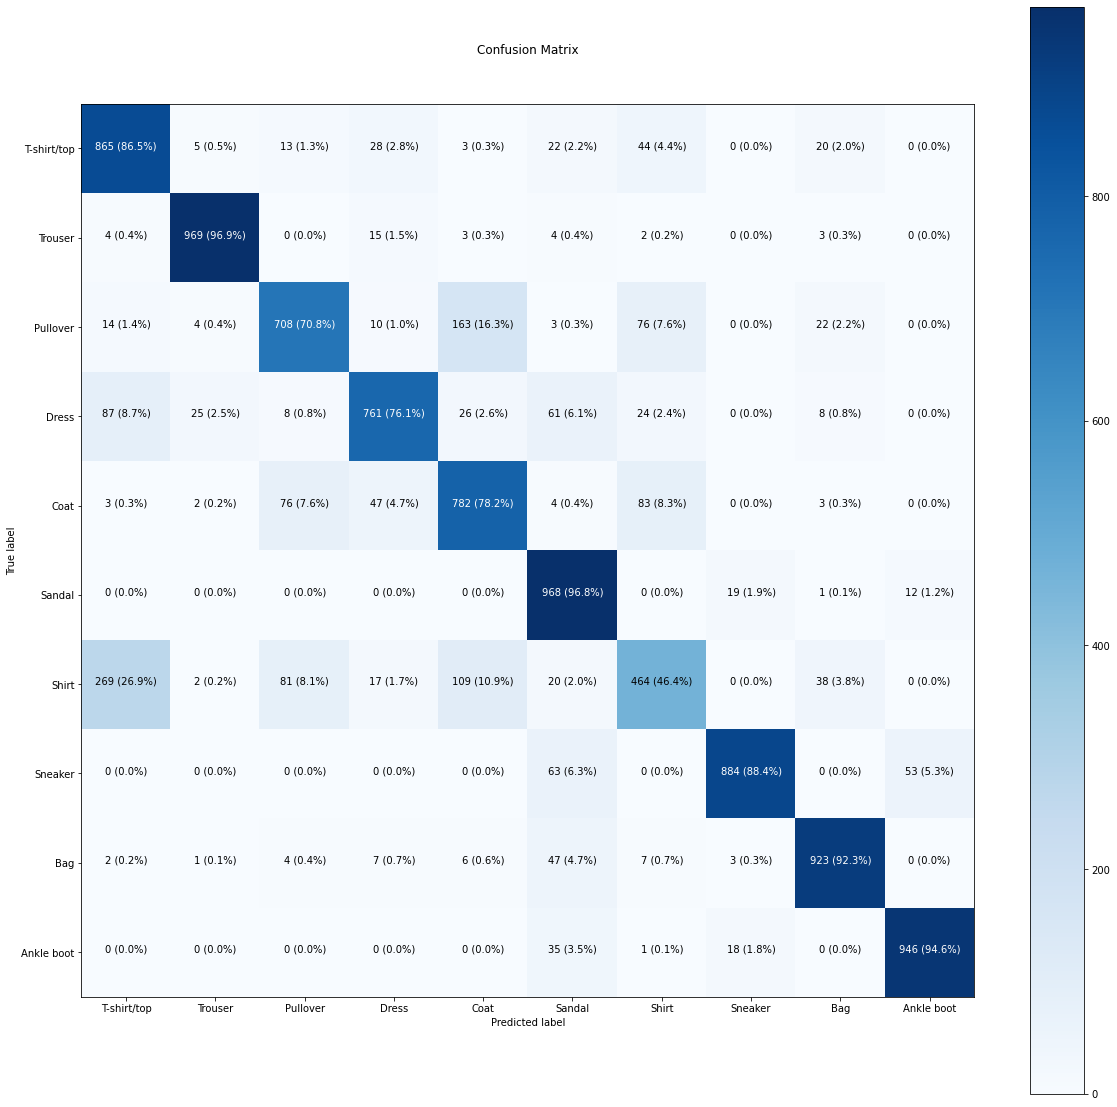

In [137]:
make_confusion_matrix(test_labels, y_pred_fashion, classes=class_names, figsize=(20,20), text_size=10)

# **Extra--Model visulization**

In [139]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

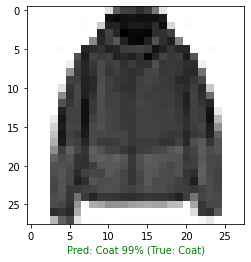

In [141]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [142]:
model_4.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_91 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_92 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [143]:
model_4.layers

In [144]:
model_4.layers[1]

In [147]:
# Get the patterns of a layer in our network
weights, biases = model_4.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 2.7114980e-02, -9.7203404e-03, -1.4470536e+00, ...,
         -1.9456115e+00,  8.0213882e-02,  2.0560704e-02],
        [-2.1336708e-02,  2.2910014e-03, -3.7213831e+00, ...,
         -2.9210405e+00,  1.0914606e+01, -4.4275820e-03],
        [ 5.2040890e-02,  7.9473495e-02, -8.4868729e-01, ...,
         -4.2345486e+00,  6.7208867e+00, -7.6290309e-02],
        ...,
        [-6.9432870e-02, -1.7022967e-02,  9.4119024e+00, ...,
          1.6636060e+00, -5.7841606e+00,  6.8140626e-02],
        [-4.3200411e-02,  5.1778555e-03, -7.9607658e+00, ...,
          2.8181984e+00,  1.8717470e+01, -4.6335403e-02],
        [ 2.6976988e-03,  8.1407100e-02,  3.7180340e-01, ...,
          2.8720939e-01, -4.4960120e-01, -2.5588807e-02]], dtype=float32),
 (784, 100))

In [148]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([-4.7187940e-03, -6.0010301e-03, -8.5897511e-01,  2.1940623e-01,
        -8.9013852e-02, -5.8410852e-03, -1.4002011e+00, -2.6307145e-01,
        -4.0490106e-03, -1.0365182e-01,  4.1308695e-01, -1.4664760e-01,
        -7.5376467e-03, -3.5177939e+00, -8.4753735e-03, -5.7723392e-03,
        -6.1607016e-03, -5.6098288e-01, -2.4467225e-03, -5.9730875e-01,
         8.1936702e-02, -4.7272265e-01, -5.5802669e-03, -3.6267924e+00,
        -6.0033901e-03, -7.7861357e-03, -6.5956870e-03, -1.9119070e-01,
        -8.3267468e-01, -2.4475174e-01, -9.9828386e-01, -6.0009556e-03,
        -2.0692742e+00, -8.4391874e-01, -1.0508215e+00, -2.6823142e+00,
         4.4399071e-01, -2.0684953e+00, -6.0039731e-03,  6.9676034e-02,
        -5.7460392e-01,  4.2998411e-02, -6.0016592e-03, -6.9668275e-01,
        -2.5239930e-01, -2.0164504e+00, -1.3558477e+00,  1.9048528e-01,
         3.4572345e-01, -1.4800140e-01, -8.6388868e-01, -1.3645606e+00,
        -1.6160598e-01, -8.2949065e-03, -2.0788018e-01, -9.19195

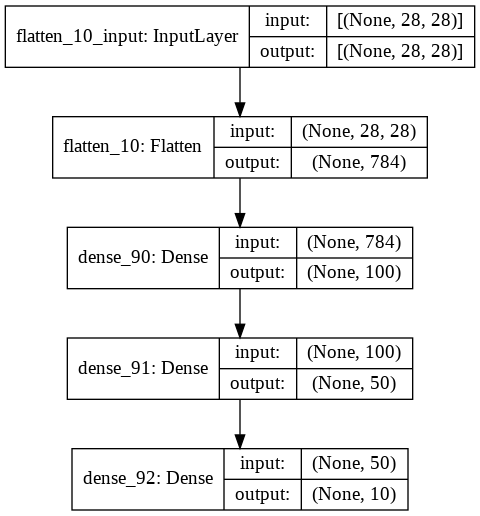

In [150]:

from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_4, show_shapes=True)